## Import Libraries

In [0]:
#load packages
import sys


import pandas as pd #collection of functions for data processing and analysis 
import matplotlib #collection of functions for scientific  visualization

from collections import Counter
import numpy as np #package for scientific computing


import scipy as sp #functions for scientific computing and advance mathematics


import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook


import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Classification Model Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
#Common Model Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')




scikit-learn version: 0.22.1


## I. Meet and Greet Data

In [0]:
df = pd.read_csv('Dataset_Attachment_A.csv')
df.shape

(80046, 13)

In [0]:
df.head()

,query_id,url_id,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
0,4631,28624,2,1,0.09,0.15,1288,352,376,13,0.46,0.35,0
1,4631,28625,2,1,0.20,0.35,4662,337,666,28,0.43,0.27,1
2,4631,28626,2,1,0.36,0.49,1121,385,270,15,0.34,0.20,1
3,4631,28627,2,1,0.21,0.45,2925,478,640,14,0.44,0.33,1
4,4631,28628,2,1,0.25,0.42,1328,429,412,27,0.40,0.57,1


In [0]:
df[df['query_len']==2].groupby(['url_id'])['sig3'].sum()

df[df['q_l']==2].groupby([url_id]).agg({'duartion':sum, 'sig6':sum})

In [0]:
df.dtypes

query_id          int64
url_id            int64
query_length      int64
is_homepage       int64
sig1            float64
sig2            float64
sig3              int64
sig4              int64
sig5              int64
sig6              int64
sig7            float64
sig8            float64
relevance         int64
dtype: object

## II Data Preprocessing and Exploratory Data Analysis

1. Checking for missing values
2. Outlier Detecting using Box plots 
3. Outlier Capping using quatile distribution
4. Univariate Analysis of Categorical and Continous variable 
5. Transformation (log) due to skewed distribution of data
6. Bivariate Analysis using t-test, correlation plot and chi-square test
 

In [0]:
# Check for Null values
df.isnull().sum()

query_id        0
url_id          0
query_length    0
is_homepage     0
sig1            0
sig2            0
sig3            0
sig4            0
sig5            0
sig6            0
sig7            0
sig8            0
relevance       0
dtype: int64

In [0]:
# Making a copy 
df1 = df.copy(deep = True)

In [0]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = df.drop(['query_id','url_id'], axis=1)

In [0]:
# Changing the data type of relevance and is_hompage 
df = df.astype({"relevance":'int64', "is_homepage":'object',"query_length":'float64'}) 
  
# Now print the data type  
# of all columns after change 
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80046 entries, 0 to 80045
Data columns (total 20 columns):
query_length    80046 non-null float64
is_homepage     80046 non-null object
sig1            80046 non-null float64
sig2            80046 non-null float64
sig3            80046 non-null int64
sig4            80046 non-null int64
sig5            80046 non-null int64
sig6            80046 non-null int64
sig7            80046 non-null float64
sig8            80046 non-null float64
relevance       80046 non-null int64
ql_bin          80046 non-null int64
sig1_bin        80046 non-null int64
sig2_bin        80046 non-null int64
sig3_bin        80046 non-null int64
sig4_bin        80046 non-null int64
sig5_bin        80046 non-null int64
sig6_bin        80046 non-null int64
sig7_bin        80046 non-null int64
sig8_bin        80046 non-null int64
dtypes: float64(5), int64(14), object(1)
memory usage: 12.2+ MB


In [0]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 1 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v >= n )
    
    return multiple_outliers   

# detect outliers of all the numerical variables with atleast 4 variables 
Outliers_to_drop = detect_outliers(df,4,["query_length","sig1","sig2","sig3","sig4","sig5","sig6","sig7","sig8"])


In [0]:
len(Outliers_to_drop)

2640

In [0]:
df.describe()


,query_length,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
count,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000
mean,2.585826,0.183240,0.346947,4857.078555,742.316256,550.527597,14.099155,0.319464,0.471846,0.437086
std,1.522094,0.147354,0.172545,23531.973200,4818.359126,1887.933968,90.068426,0.138651,0.231306,0.496029
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.080000,0.210000,78.000000,24.000000,10.000000,0.000000,0.220000,0.290000,0.000000
50%,2.000000,0.150000,0.340000,417.000000,220.000000,64.000000,0.000000,0.310000,0.460000,0.000000
75%,3.000000,0.240000,0.480000,2537.750000,591.000000,336.000000,2.000000,0.420000,0.640000,1.000000
max,18.000000,1.000000,0.860000,673637.000000,660939.000000,46994.000000,3645.000000,0.880000,0.940000,1.000000


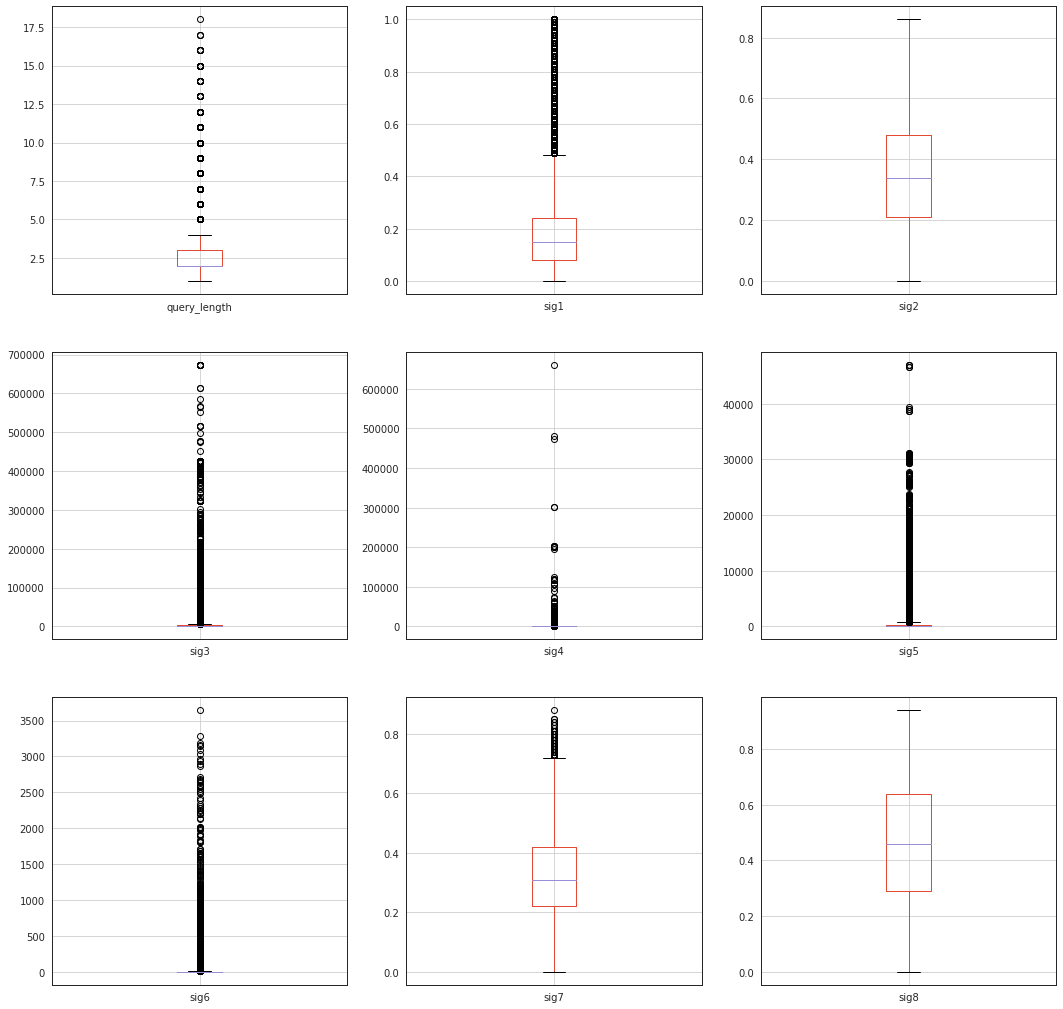

In [0]:

#Box plot to check the outlier
columns=['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8']


fig = plt.figure(figsize=(18, 18))
for i in range(0,len(columns)):
  plt.subplot(3, 3, i+1)
  df[[columns[i]]].boxplot()



# plt.show()

## Insights: From above table we can observe that most of the variable except sig1, sig2, sig7,sig8 are skewed. So we need to transform the variables either by log, cubroot+ norm etc.


query_length


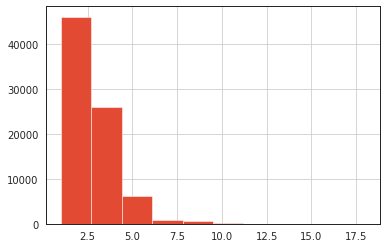

sig1


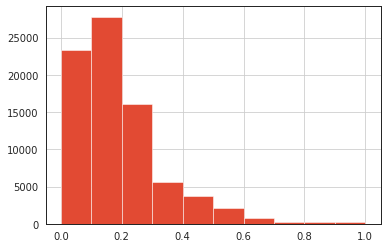

sig2


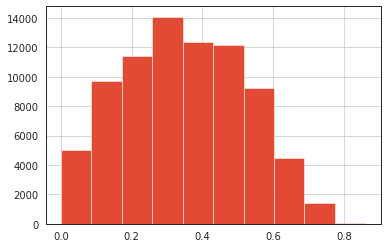

sig3


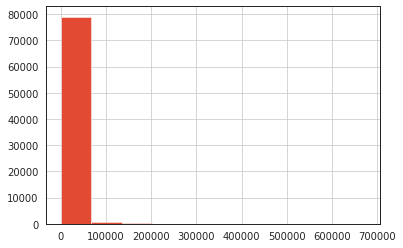

sig4


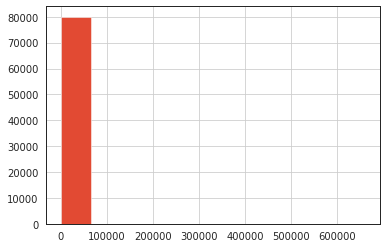

sig5


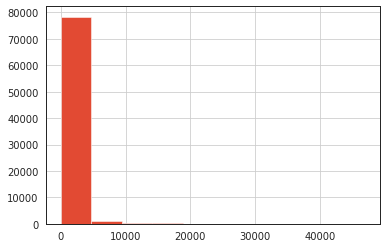

sig6


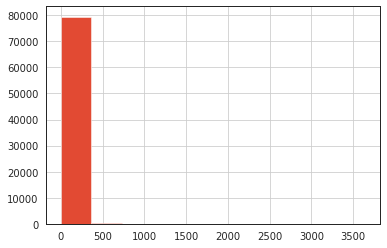

sig7


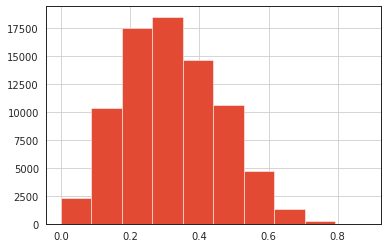

sig8


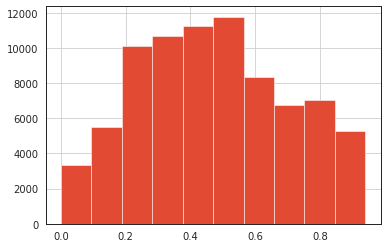

In [0]:
# Distribution of all the numerical variable

columns=['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8']

col=['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8']

for i in col:
  print(i)
  df[i].hist()
  plt.show()    

In [0]:
df.columns

Index(['query_length', 'is_homepage', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5',
       'sig6', 'sig7', 'sig8', 'relevance'],
      dtype='object')

In [0]:
# Outlier Distribution
df_temp=df[['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8', 'relevance','is_homepage']]
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1
mask = (df_temp < (Q1 - 1.5 * IQR)) | (df_temp > (Q3 + 1.5 * IQR))
df_temp[mask] = np.nan
df_temp.isnull().sum()


query_length     7910
sig1             3816
sig2                0
sig3            11706
sig4             7967
sig5            11159
sig6            14942
sig7              173
sig8                0
relevance           0
is_homepage         0
dtype: int64

In [0]:
#Checking the distribution

df['sig3'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1])

0.10        12.00
0.20        46.00
0.30       112.00
0.40       214.00
0.50       417.00
0.60       835.00
0.70      1731.00
0.80      3866.00
0.90      8489.00
0.95     14516.25
1.00    673637.00
Name: sig3, dtype: float64

In [0]:
#Capping with 80% percentile value
df_new=df.clip(lower=df.quantile(0.05),upper=df.quantile(0.8),axis=1)
df_new['is_homepage']=df['is_homepage']
df_temp=df_new[['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8']]
Q1 = df_temp.quantile(0.25)
Q3 = df_temp.quantile(0.75)
IQR = Q3 - Q1

mask = (df_temp < (Q1 - 1.5 * IQR)) | (df_temp > (Q3 + 1.5 * IQR))
df_temp[mask] = np.nan
df_temp.isnull().sum()

query_length    0
sig1            0
sig2            0
sig3            0
sig4            0
sig5            0
sig6            0
sig7            0
sig8            0
dtype: int64

In [0]:
df_new.head()

,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
0,2,1,0.09,0.15,1288,352,376,5,0.44,0.35,0
1,2,1,0.20,0.35,3866,337,490,5,0.43,0.27,1
2,2,1,0.27,0.49,1121,385,270,5,0.34,0.20,1
3,2,1,0.21,0.45,2925,478,490,5,0.44,0.33,1
4,2,1,0.25,0.42,1328,429,412,5,0.40,0.57,1


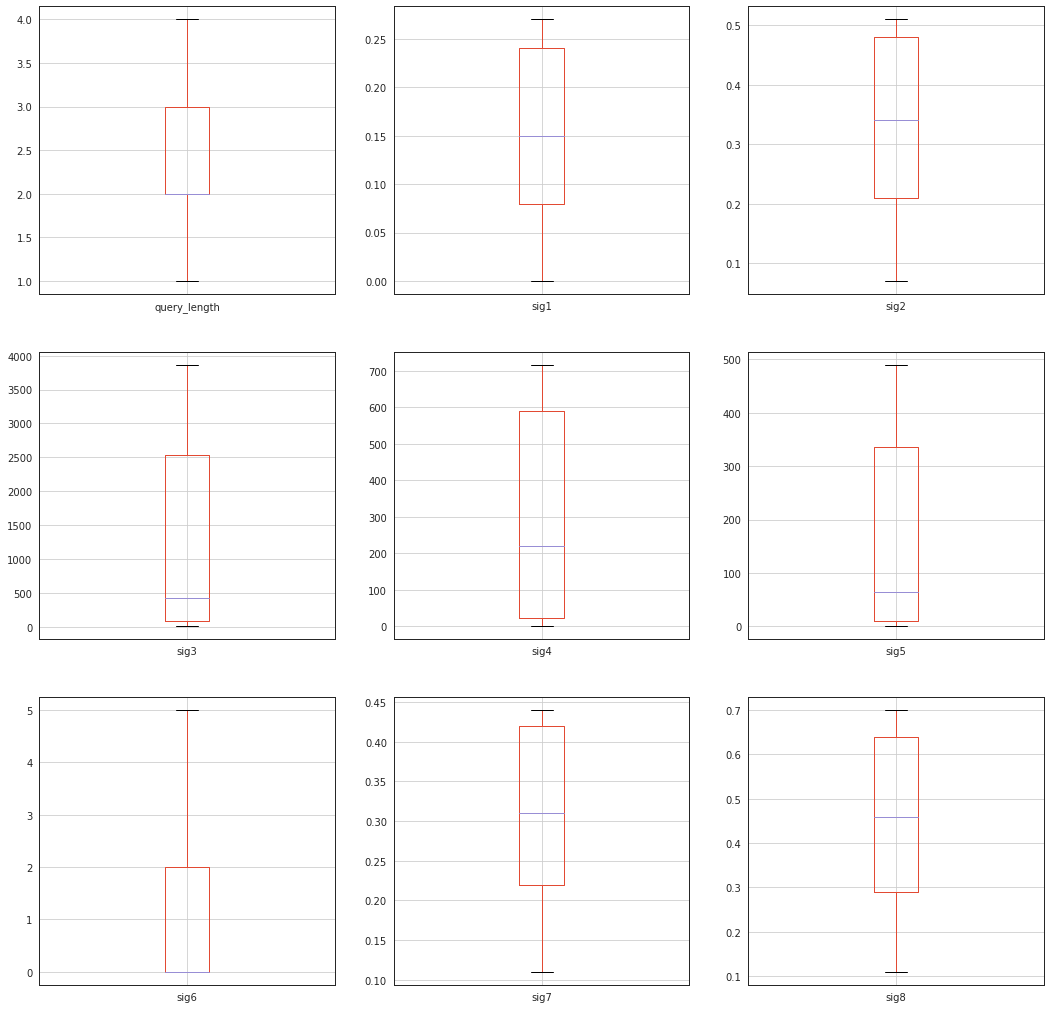

In [0]:
columns=['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8']


fig = plt.figure(figsize=(18, 18))
for i in range(0,len(columns)):
  plt.subplot(3, 3, i+1)
  df_new[[columns[i]]].boxplot()


## Distribution of variables after the outlier treatment

In [0]:
df_new.head()

,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance,query_lengthtf,sig1tf,sig3tf,sig4tf,sig5tf,sig6tf,sig7tf
0,2,1,0.09,0.15,1288,352,376,5,0.44,0.35,0,0.477121,0.037426,3.110253,2.547775,2.576341,0.778151,0.158362
1,2,1,0.20,0.35,3866,337,490,5,0.43,0.27,1,0.477121,0.079181,3.587374,2.528917,2.691081,0.778151,0.155336
2,2,1,0.27,0.49,1121,385,270,5,0.34,0.20,1,0.477121,0.103804,3.049993,2.586587,2.432969,0.778151,0.127105
3,2,1,0.21,0.45,2925,478,490,5,0.44,0.33,1,0.477121,0.082785,3.466274,2.680336,2.691081,0.778151,0.158362
4,2,1,0.25,0.42,1328,429,412,5,0.40,0.57,1,0.477121,0.096910,3.123525,2.633468,2.615950,0.778151,0.146128


query_length


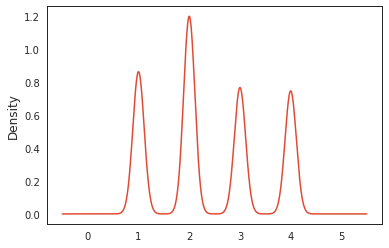

sig1


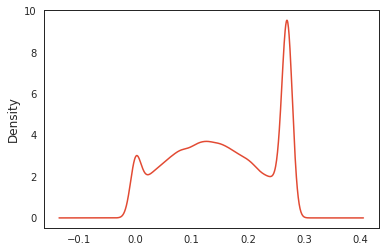

sig2


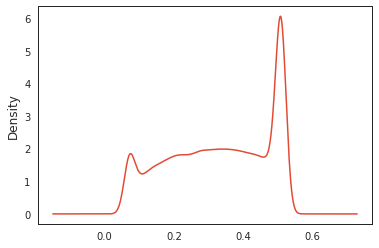

sig3


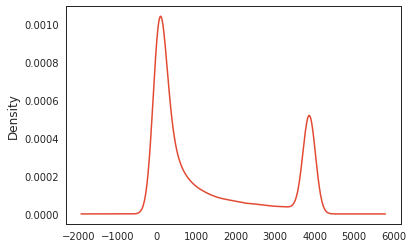

sig4


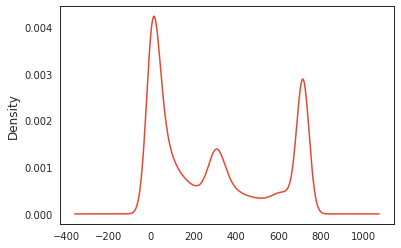

sig5


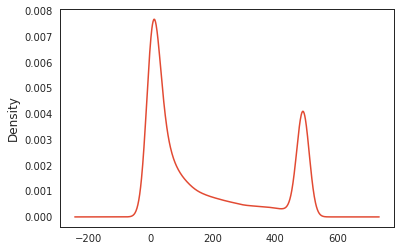

sig6


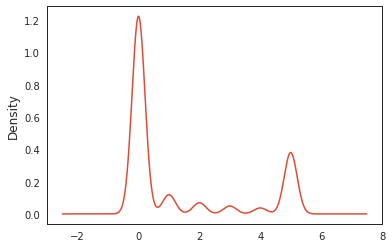

sig7


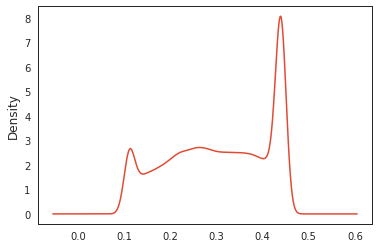

sig8


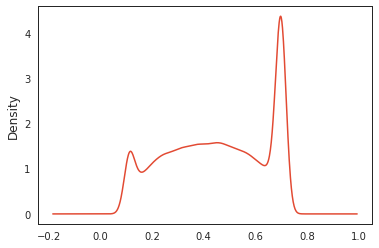

In [0]:
# Distribution of all the numerical variable

col=['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8']

for i in col:
  print(i)
  # df_new[i].hist(bins=15)
  df_new[i].plot.kde()
  plt.show()  

Action to be taken: Based on the above distribution we can see that we need the variables are either skewed distribution or bimodal then either log transformation or exponential transformation

Reference:
Baker, G. A. "Transformations of Bimodal Distriburtions." The annals of mathematical statistics 1, no. 4 (1930): 334-344.

In [0]:
#Transformation (log(x+1))
columns=['query_length', 'sig1','sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7','sig8']
import numpy as np
for c in columns:
    k=c+'tf'
    df_new[k] = np.log10(df_new[c]+1)


## Distribution of Target Variable

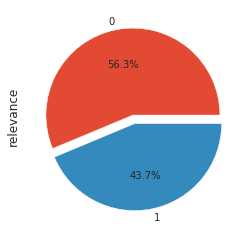

In [0]:
#Relevance distribution
df_new['relevance'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')


## Categorical varible distribution w.r.t target variable

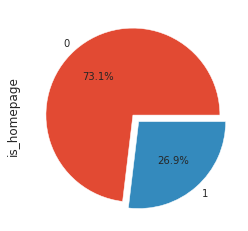

In [0]:
#Homepage distribution
df_new['is_homepage'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')


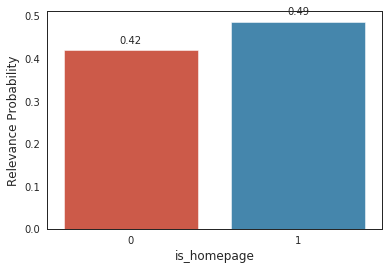

In [0]:
g = sns.barplot(x="is_homepage",y="relevance",data=df_new,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")


## Chi-square Test for categorical variable

In [0]:
from scipy.stats import chi2_contingency
# we create contingency table same as above

x=pd.crosstab(df_new['is_homepage'],df_new['relevance'])

# x=[df_new['is_homepage'].values.tolist(),df_new['relevance'].values.tolist()]

# # Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(x)
# select significance value
alpha = 0.05
# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Variables are associated (reject H0)')
else:
    print('Variables are not associated(fail to reject H0)')

significance=0.050, p=0.000
Variables are associated (reject H0)


## Pearson correlation between all continuous variable

In [0]:
df_new.columns

Index(['query_length', 'is_homepage', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5',
       'sig6', 'sig7', 'sig8', 'relevance', 'query_lengthtf', 'sig1tf',
       'sig2tf', 'sig3tf', 'sig4tf', 'sig5tf', 'sig6tf', 'sig7tf', 'sig8tf'],
      dtype='object')

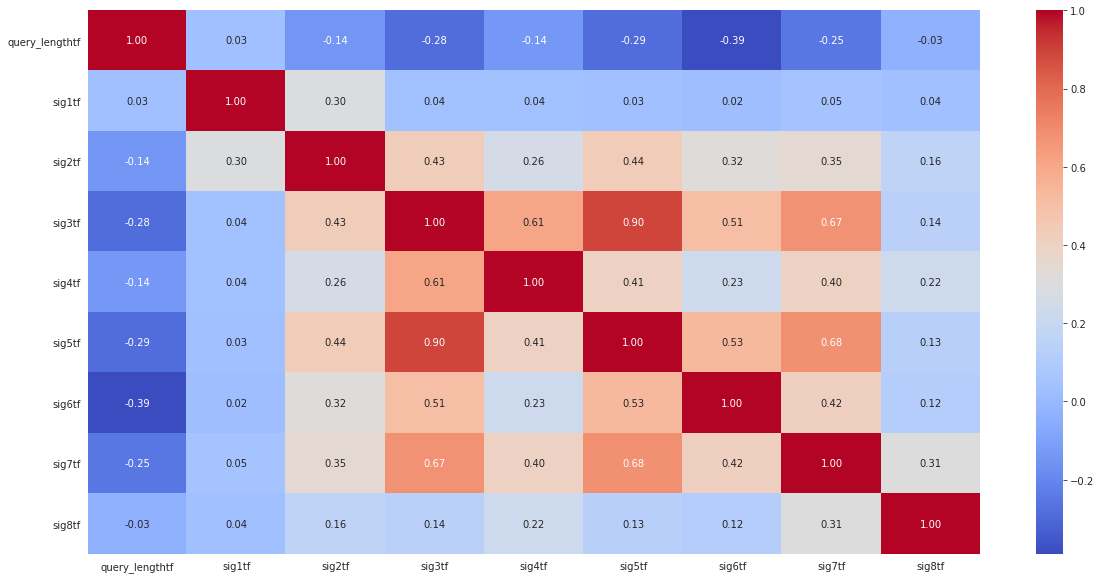

In [0]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
columns=['query_lengthtf', 'sig1tf','sig2tf', 'sig3tf', 'sig4tf', 'sig5tf', 'sig6tf', 'sig7tf', 'sig8tf']
plt.figure(figsize=(20, 10))
g = sns.heatmap(df_new[['query_lengthtf', 'sig1tf','sig2tf', 'sig3tf', 'sig4tf', 'sig5tf', 'sig6tf', 'sig7tf', 'sig8tf']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [0]:
df.head()

,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
0,2,1,0.09,0.15,1288,352,376,13,0.46,0.35,0
1,2,1,0.20,0.35,4662,337,666,28,0.43,0.27,1
2,2,1,0.36,0.49,1121,385,270,15,0.34,0.20,1
3,2,1,0.21,0.45,2925,478,640,14,0.44,0.33,1
4,2,1,0.25,0.42,1328,429,412,27,0.40,0.57,1


In [0]:
df['ql_bin'] = pd.qcut(df['query_length'], 3)
df['sig1_bin'] = pd.qcut(df['sig1'], 5)
df['sig2_bin'] = pd.qcut(df['sig2'], 5)
df['sig3_bin'] = pd.qcut(df['sig3'], 5)
df['sig4_bin'] = pd.qcut(df['sig4'], 5)
df['sig5_bin'] = pd.qcut(df['sig5'], 5)
df['sig6_bin'] = pd.cut(df['sig6'], 5)
df['sig7_bin'] = pd.qcut(df['sig7'], 5)
df['sig8_bin'] = pd.qcut(df['sig8'], 5)




In [0]:
pd.qcut(df['query_length'], 3).value_counts()

(0.999, 2.0]    46166
(2.0, 3.0]      17165
(3.0, 18.0]     16715
Name: query_length, dtype: int64

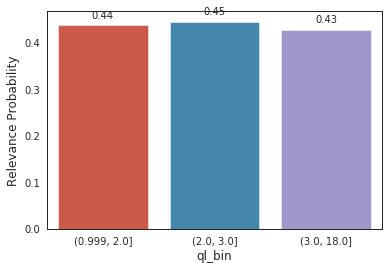

In [0]:
g = sns.barplot(x="ql_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")


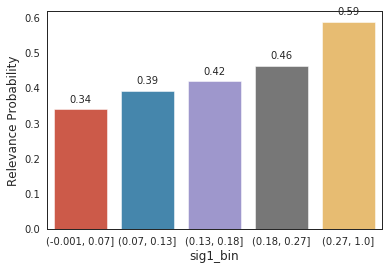

In [0]:
g = sns.barplot(x="sig1_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

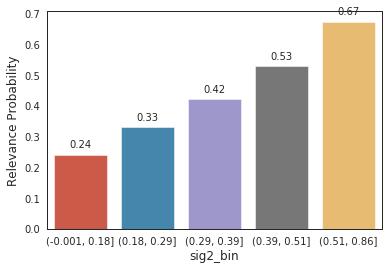

In [0]:
g = sns.barplot(x="sig2_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

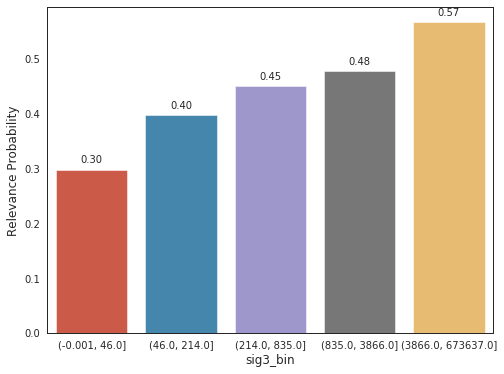

In [0]:

fig = plt.figure(figsize=(8, 6))
g = sns.barplot(x="sig3_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

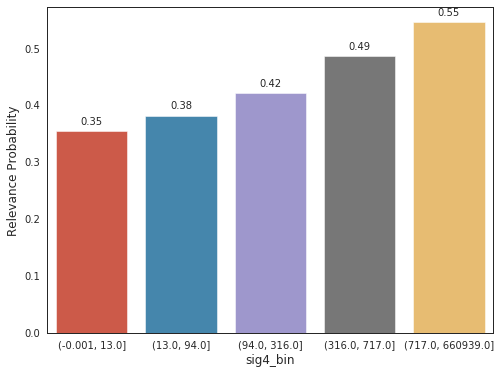

In [0]:

fig = plt.figure(figsize=(8, 6))
g = sns.barplot(x="sig4_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

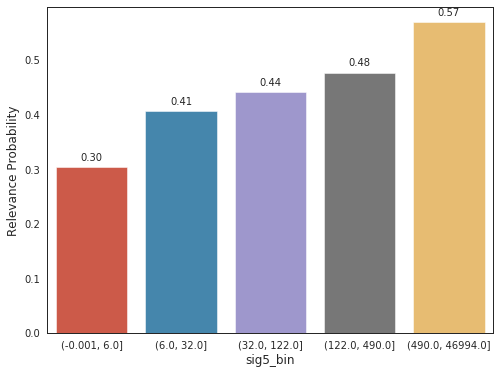

In [0]:

fig = plt.figure(figsize=(8, 6))
g = sns.barplot(x="sig5_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

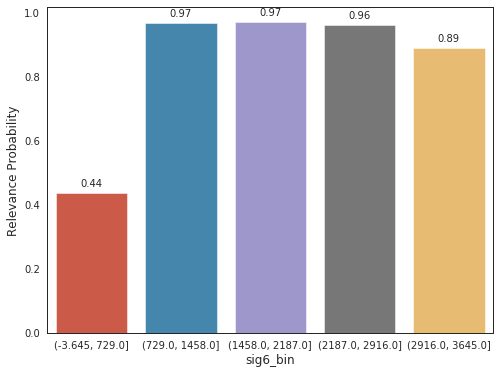

In [0]:

fig = plt.figure(figsize=(8, 6))
g = sns.barplot(x="sig6_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

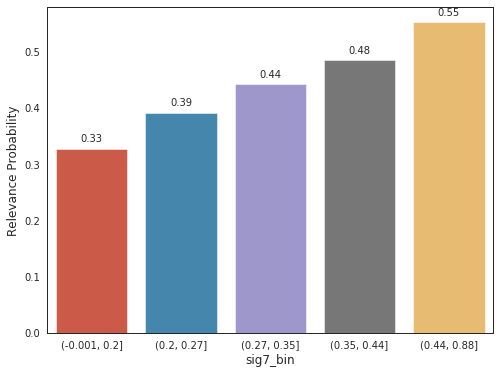

In [0]:
fig = plt.figure(figsize=(8, 6))
g = sns.barplot(x="sig7_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

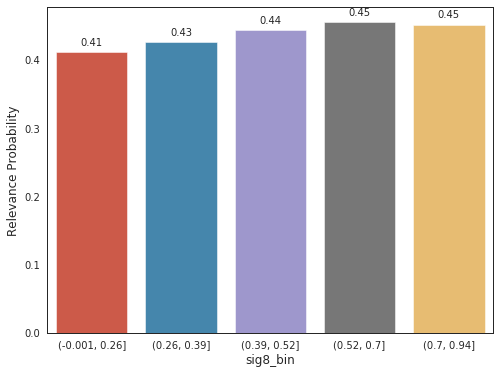

In [0]:
fig = plt.figure(figsize=(8, 6))
g = sns.barplot(x="sig8_bin",y="relevance",data=df,ci=None)
for p in g.patches:
  g.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
g = g.set_ylabel("Relevance Probability")

## Takeaway from the Plots

One thing that that the Pearson Correlation plot can tell us is that there are not too many features strongly correlated with one another. This is good from a point of view of feeding these features into your learning model because this means that there isn't much redundant or superfluous data in our training set and we are happy that each feature carries with it some unique information

## T Test between Continuous Variable and the target Variable

In [0]:
from scipy import stats
for i in ['query_lengthtf', 'sig1tf','sig2tf', 'sig3tf', 'sig4tf', 'sig5tf', 'sig6tf', 'sig7tf', 'sig8tf']:
  df_1=df_new[df_new['relevance']==1]
  df_0=df_new[df_new['relevance']==0]
  a=df_1[i].values.tolist()
  b=df_0[i].values.tolist()
  t2, p2 = stats.ttest_ind(a,b)
  alpha = 0.05
# Determine whether to reject or keep your null hypothesis
  print('significance=%.3f, p=%.3f' % (alpha, p))
  if p2 <= alpha:
      print(i,'Variables are associated (reject H0)')
  else:
      print(i,'Variables are not associated(fail to reject H0)')
  

significance=0.050, p=0.000
query_lengthtf Variables are associated (reject H0)
significance=0.050, p=0.000
sig1tf Variables are associated (reject H0)
significance=0.050, p=0.000
sig2tf Variables are associated (reject H0)
significance=0.050, p=0.000
sig3tf Variables are associated (reject H0)
significance=0.050, p=0.000
sig4tf Variables are associated (reject H0)
significance=0.050, p=0.000
sig5tf Variables are associated (reject H0)
significance=0.050, p=0.000
sig6tf Variables are associated (reject H0)
significance=0.050, p=0.000
sig7tf Variables are associated (reject H0)
significance=0.050, p=0.000
sig8tf Variables are associated (reject H0)


# Pairplots

Finally let us generate some pairplots to observe the distribution of data from one feature to the other. Once again we use Seaborn to help us.

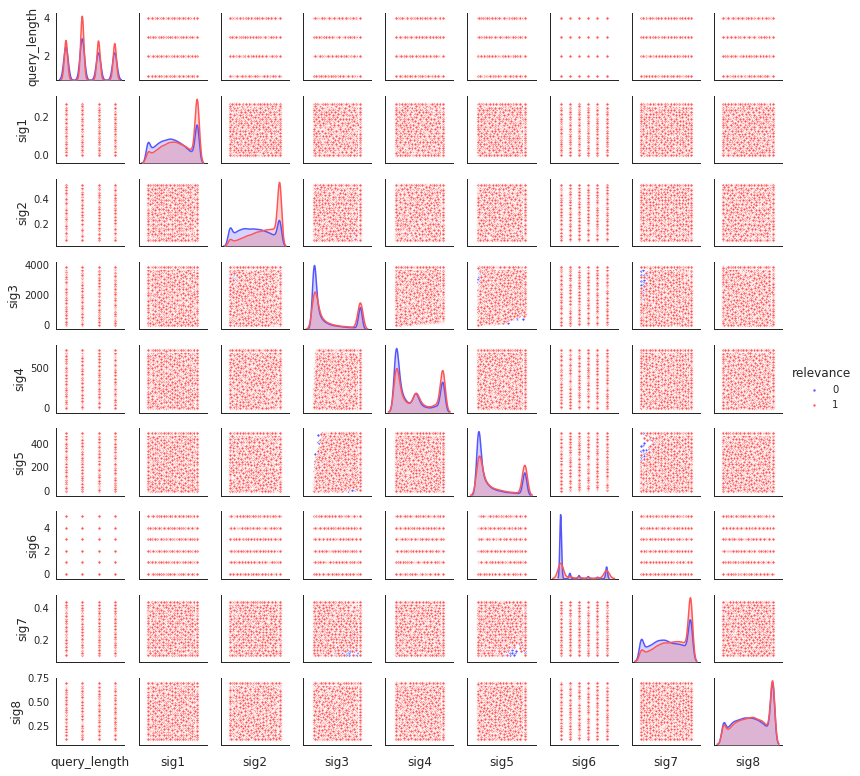

In [0]:
g = sns.pairplot(df_new[['relevance','query_length', 'sig1','sig2', 'sig3', 'sig4', 'sig5', 'sig6', 'sig7', 'sig8']], hue='relevance', palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

## Distribution of continuous variable with respective Target variable

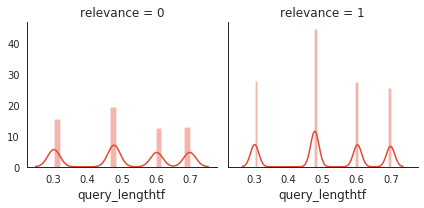

In [0]:
# Explore Query length vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "query_lengthtf",kde = True)

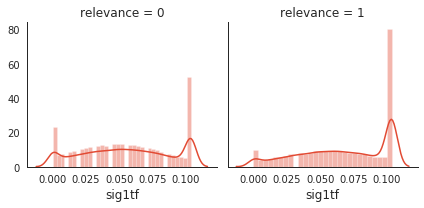

In [0]:
# Explore sig1 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "sig1tf",kde = True)



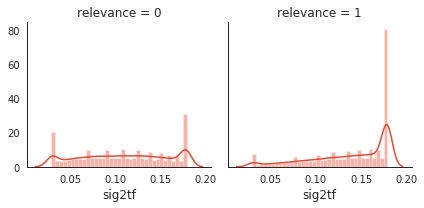

In [0]:
# Explore sig2 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g=g.map(sns.distplot, "sig2tf",kde = True)

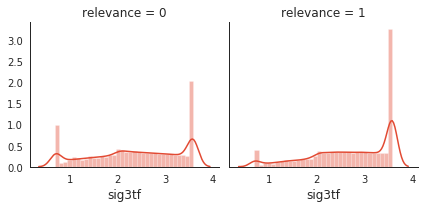

In [0]:
# Explore sig3 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "sig3tf",kde = True)

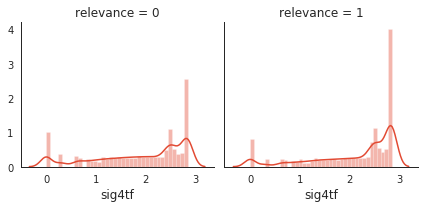

In [0]:
# Explore sig4 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "sig4tf",kde = True)

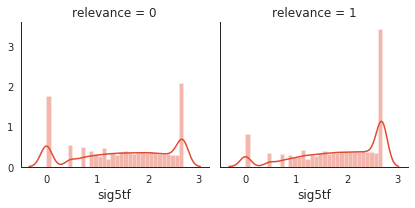

In [0]:
# Explore sig5 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "sig5tf",kde = True)

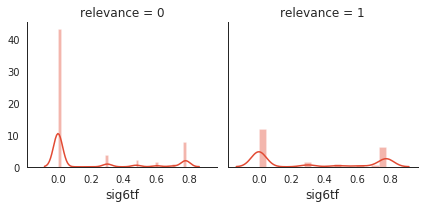

In [0]:
# Explore sig6 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "sig6tf",kde = True)

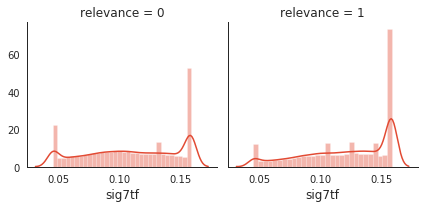

In [0]:
# Explore sig7 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "sig7tf",kde = True)

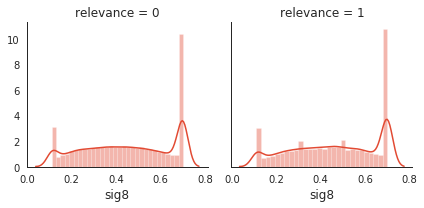

In [0]:
# Explore sig8 vs Relevance
g = sns.FacetGrid(df_new, col='relevance')
g = g.map(sns.distplot, "sig8",kde = True)

# **III:Implementation of Classification Models (Logistic Regression, Random Forest and Support vector machine)**

Step1: Normalization of continuous variable if required

Step2: Dummy creation for the categorical variable

Step3: Spliting the dataset into train and validation

Step4: Training and tunning the hyperparamter using the grid search and k-fold cross validation

Step5: Testing on the best parameters found during the hyperparameter tunning

**Best Parameters found**

1. Logistic Regression: {'C': 1000.0, 'penalty': 'l2'}
   
   C: Regualization Parameter
   and l2: Ridge regression adds “squared magnitude” of coefficient as penalty term to the loss function. 

2. Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}



*   max_depth: depth of the tree
*   n_estimators: number of decision trees  
*   max_feature: max feature consider while building the tree
*   criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain





3. Support vector machine:{'C': 10, 'kernel': 'rbf'}

   

*   C: The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 
*   Kernal: Type of Kernal used



  


Step5: Model Validation metrics

1. Confusion Matrics: A confusion matrix is a summary of prediction results on a classification problem. The number of correct and incorrect predictions are summarized with count values and broken down by each class.
2. AOC curve: Area under the curve of ROC curve: ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. 
3. F1 Score:
4. Accuracy, Precision and Recall

Recall: True Positive Rate
Precision: 
Accuracy 


In [0]:
# df=df_new
one_hot_salary = pd.get_dummies(df['is_homepage'])
df = df.join(one_hot_salary)
df=df.drop(['is_homepage'], axis=1)

In [0]:
df.head()

,query_length,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance,0,1
0,2,0.09,0.15,1288,352,376,5,0.44,0.35,0,0,1
1,2,0.20,0.35,3866,337,490,5,0.43,0.27,1,0,1
2,2,0.27,0.49,1121,385,270,5,0.34,0.20,1,0,1
3,2,0.21,0.45,2925,478,490,5,0.44,0.33,1,0,1
4,2,0.25,0.42,1328,429,412,5,0.40,0.57,1,0,1


In [0]:
df=df.drop(['sig1','sig2','sig3','sig4','sig5','sig6','sig7','sig8','query_length'],axis=1)

In [0]:
df.columns

Index(['query_length',         'sig1',         'sig2',         'sig3',
               'sig4',         'sig5',         'sig6',         'sig7',
               'sig8',    'relevance',              0,              1],
      dtype='object')

In [0]:

df.columns = ['query_length','sig1','sig2','sig3','sig4','sig5','sig6','sig7','sig8','relevance','is_home_0','is_home_1']
df.head()

,query_length,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance,is_home_0,is_home_1
0,2,0.09,0.15,1288,352,376,5,0.44,0.35,0,0,1
1,2,0.20,0.35,3866,337,490,5,0.43,0.27,1,0,1
2,2,0.27,0.49,1121,385,270,5,0.34,0.20,1,0,1
3,2,0.21,0.45,2925,478,490,5,0.44,0.33,1,0,1
4,2,0.25,0.42,1328,429,412,5,0.40,0.57,1,0,1


In [0]:

df.columns = ['relevance','query_lengthtf','sig1tf','sig2tf','sig3tf','sig4tf','sig5tf','sig6tf','sig7tf','sig8tf','is_home_0','is_home_1']
df.head()

,relevance,query_lengthtf,sig1tf,sig2tf,sig3tf,sig4tf,sig5tf,sig6tf,sig7tf,sig8tf,is_home_0,is_home_1
0,0,0.477121,0.037426,0.060698,3.110253,2.547775,2.576341,0.778151,0.158362,0.130334,0,1
1,1,0.477121,0.079181,0.130334,3.587374,2.528917,2.691081,0.778151,0.155336,0.103804,0,1
2,1,0.477121,0.103804,0.173186,3.049993,2.586587,2.432969,0.778151,0.127105,0.079181,0,1
3,1,0.477121,0.082785,0.161368,3.466274,2.680336,2.691081,0.778151,0.158362,0.123852,0,1
4,1,0.477121,0.096910,0.152288,3.123525,2.633468,2.615950,0.778151,0.146128,0.195900,0,1


In [0]:
df_log = df.copy(deep = True)

## Logistic Regression

In [0]:
# Standardization for logistic regression

from sklearn import preprocessing
# x = df[['query_lengthtf', 'sig1', 'sig2', 'sig3tf', 'sig4tf', 'sig5tf','sig6tf', 'sig7tf', 'sig8']]
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# x_new = pd.DataFrame(x_scaled)
# df_log = pd.concat([df[['relevance','is_home_1','is_home_0']],x_new])

column_names_to_normalize = ['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5','sig6', 'sig7', 'sig8']
x = df_log[column_names_to_normalize].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_log.index)
df_log[column_names_to_normalize] = df_temp

In [0]:
df_log.head()

,query_id,url_id,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
0,4631,28624,0.058824,1,0.09,0.174419,0.001912,0.000533,0.008001,0.003567,0.522727,0.372340,0
1,4631,28625,0.058824,1,0.20,0.406977,0.006921,0.000510,0.014172,0.007682,0.488636,0.287234,1
2,4631,28626,0.058824,1,0.36,0.569767,0.001664,0.000583,0.005745,0.004115,0.386364,0.212766,1
3,4631,28627,0.058824,1,0.21,0.523256,0.004342,0.000723,0.013619,0.003841,0.500000,0.351064,1
4,4631,28628,0.058824,1,0.25,0.488372,0.001971,0.000649,0.008767,0.007407,0.454545,0.606383,1


In [0]:
X = df_log.drop('relevance', axis=1)
y = df_log['relevance']
RS = 1000
# Split dataframe into training and test/validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [0]:
# Grid search cross validation

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.6593947364031324


In [0]:
from sklearn.metrics import roc_auc_score,confusion_matrix
logreg2=LogisticRegression(C=0.1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))
y_pred = logreg2.predict(X_test.values)
print("f1score",roc_auc_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

score 0.6601499063085572
f1score 0.6442605142737348
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      9081
           1       0.63      0.53      0.57      6929

    accuracy                           0.66     16010
   macro avg       0.65      0.64      0.65     16010
weighted avg       0.66      0.66      0.66     16010



In [0]:
# coefficients = pd.DataFrame({"Feature":X.columns,"Coefficients":np.transpose(logreg2.coef_)})
print(X.columns)
print(logreg2.coef_)

Index(['query_length', 'sig1', 'sig2', 'sig3', 'sig4', 'sig5', 'sig6', 'sig7',
       'sig8', 'is_home_0', 'is_home_1'],
      dtype='object')
[[ 0.71073307  0.5733401   1.54956233 -0.08406208  0.25671031 -0.09525699
   0.89777409  0.3430528  -0.35893986  0.04146304 -0.0426941 ]]


## Random Forest

In [0]:
X = df.drop('relevance', axis=1)
y = df['relevance']
RS = 1000
# Split dataframe into training and test/validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [0]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10],
    'criterion' :['entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",CV_rfc.best_params_)
print("accuracy :",CV_rfc.best_score_)


tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 500}
accuracy : 0.662549175144156


In [0]:
# rfc2=RandomForestClassifier(n_estimators=500,max_depth=10,max_features='auto',criterion='entropy')
# rfc2.fit(X_train,y_train)
# print("score",rfc2.score(X_test,y_test))
# y_pred = rfc2.predict(X_test.values)
# print("f1score",roc_auc_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

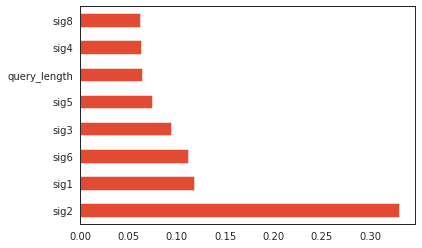

In [0]:
feat_importances = pd.Series(rfc2.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')

Extract the first tree/estimator from the Random Forest Model

In [0]:
for i in range(3):
    estimator = rfc2.estimators_[i]
    print(estimator)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=251189360, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1022852236, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='

In [0]:
import os
import graphviz
from sklearn.tree import export_graphviz
from subprocess import call

# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names =X.columns ,
                rounded = True, proportion = False,max_depth=3,
                precision = 2, filled = True)

# os.environ["PATH"] += os.pathsep + 'C:/Users/Yashu Dhatrika/Desktop/quanthub/release/bin/'
# os.system('dot -Tpng tree.dot -o random.png')

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [0]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [0]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Implementation of SVM

In [0]:
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001], 
#               'kernel': ['rbf']}  
param_grid = {'C': [10], 
              'kernel': ['rbf','linear']}  

svc=SVC(random_state=42)
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5)
CV_svc.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",CV_svc.best_params_)
print("accuracy :",CV_svc.best_score_)


In [0]:
# svc2=SVC(C=10,kernel='linear')
# svc2.fit(X_train,y_train)
# print("score",svc2.score(X_test,y_test))
# y_pred = svc2.predict(X_test.values)
# print("f1score",roc_auc_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [0]:
#gbm

In [0]:
param_grid = {'learning_rate':[0.05,0.01], 'n_estimators':[100,200,500,1000],'max_depth':[4,8]}
gbm=GradientBoostingClassifier(min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
CV_gbm=GridSearchCV(estimator=gbm, param_grid=param_grid, cv= 5)
CV_gbm.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",CV_gbm.best_params_)
print("accuracy :",CV_gbm.best_score_)

tuned hpyerparameters :(best parameters)  {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 500}
accuracy : 0.6671091033572121


In [0]:
gbm2=GradientBoostingClassifier(learning_rate=0.05, max_depth= 4, n_estimators=500,min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt')
gbm2.fit(X_train,y_train)
print("score",gbm2.score(X_test,y_test))
y_pred = gbm2.predict(X_test.values)
print("f1score",roc_auc_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

score 0.6671455340412242
f1score 0.6467506350575613
              precision    recall  f1-score   support

           0       0.67      0.80      0.73      9081
           1       0.65      0.50      0.56      6929

    accuracy                           0.67     16010
   macro avg       0.66      0.65      0.65     16010
weighted avg       0.66      0.67      0.66     16010

